In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%config InlineBackend.figure_format="svg"
plt.rcParams["figure.figsize"]=8,5
plt.rcParams["image.cmap"]="viridis"


In [2]:
df=pd.read_csv("video_games_sales.csv").dropna()
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [3]:
print("Shape: {}".format(df.shape))

Shape: (6825, 16)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
Name               6825 non-null object
Platform           6825 non-null object
Year_of_Release    6825 non-null float64
Genre              6825 non-null object
Publisher          6825 non-null object
NA_Sales           6825 non-null float64
EU_Sales           6825 non-null float64
JP_Sales           6825 non-null float64
Other_Sales        6825 non-null float64
Global_Sales       6825 non-null float64
Critic_Score       6825 non-null float64
Critic_Count       6825 non-null float64
User_Score         6825 non-null object
User_Count         6825 non-null float64
Developer          6825 non-null object
Rating             6825 non-null object
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [5]:
df["Year_of_Release"]=df["Year_of_Release"].astype("int64")
df["Critic_Count"]=df["Critic_Count"].astype("int64")
df["User_Count"]=df["User_Count"].astype("int64")
df["User_Score"]=df["User_Score"].astype("float64")


In [6]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating']
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


### DataFrame.plot()
Before we turn to Seaborn and Plotly, let’s discuss the simplest and often most convenient way to visualize data from a DataFrame: using its own plot() method.

As an example, we will create a plot of video game sales by country and year. First, let’s keep only the columns we need. Then, we will calculate the total sales by year and call the plot() method on the resulting DataFrame.



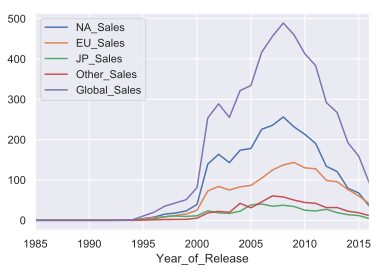

In [7]:
df[[x for x in df.columns if "Sales" in x]+["Year_of_Release"]].groupby("Year_of_Release").sum().plot();

Using the kind parameter, you can change the type of the plot to, for example, a bar chart. matplotlib is generally quite flexible for customizing plots. You can change almost everything in the chart, but you may need to dig into the documentation to find the corresponding parameters. For example, the parameter rot is responsible for the rotation angle of ticks on the x-axis (for vertical plots)

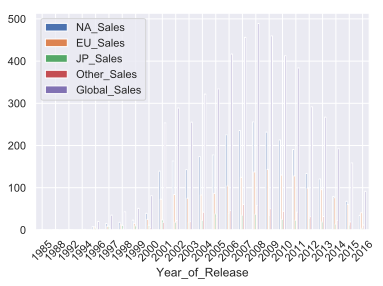

In [9]:
df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45,);


### Seaborn
Now, let's move on to the Seaborn library. seaborn is essentially a higher-level API based on the matplotlib library. Among other things, it differs from the latter in that it contains more adequate default settings for plotting. By adding `import seaborn as sns; sns.set()` in your code, the images of your plots will become much nicer. Also, this library contains a set of complex tools for visualization that would otherwise (i.e. when using bare matplotlib) require quite a large amount of code.

#### pairplot()
Let's take a look at the first of such complex plots, a pairwise relationships plot, which creates a matrix of scatter plots by default. This kind of plot helps us visualize the relationship between different variables in a single output.

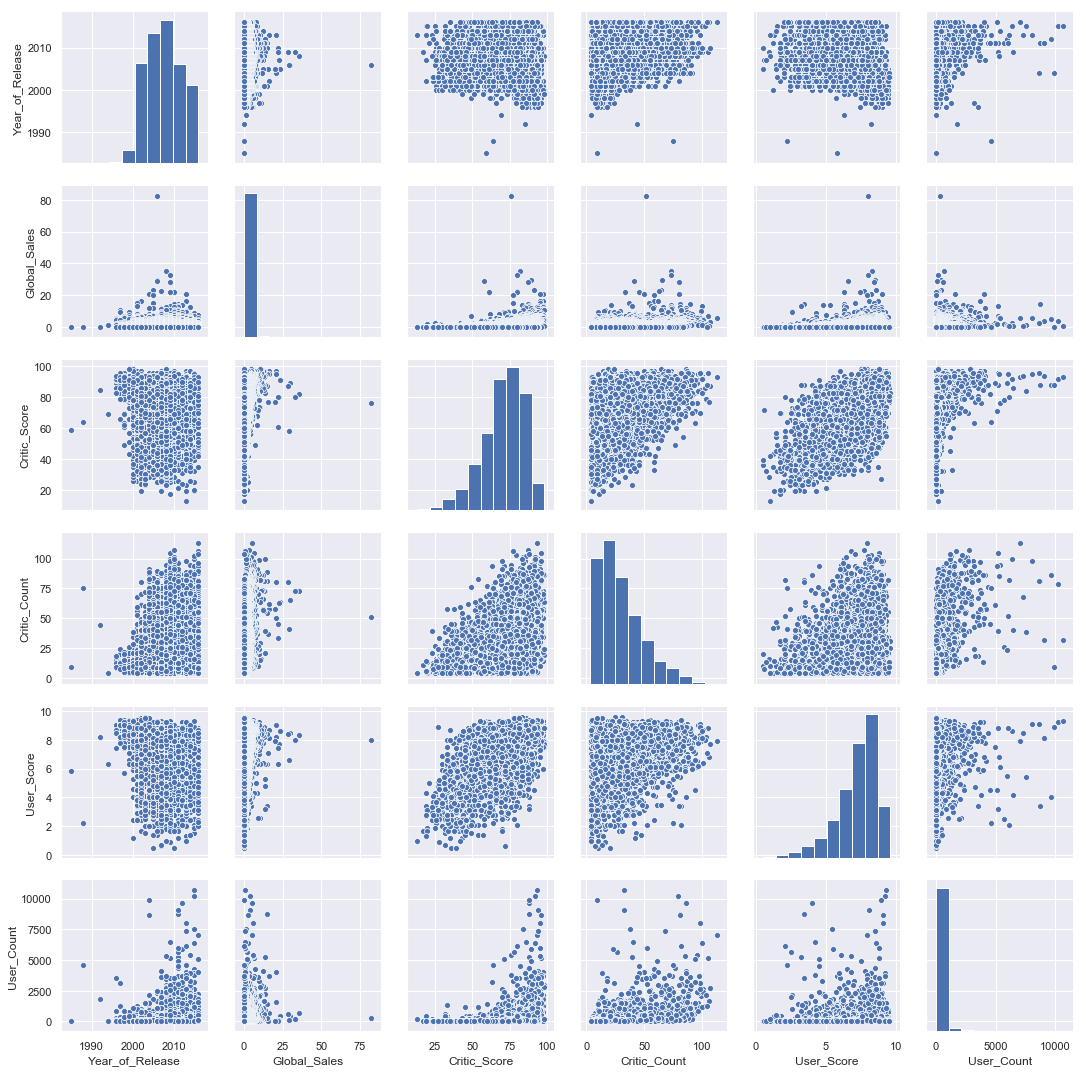

In [10]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[useful_cols]):


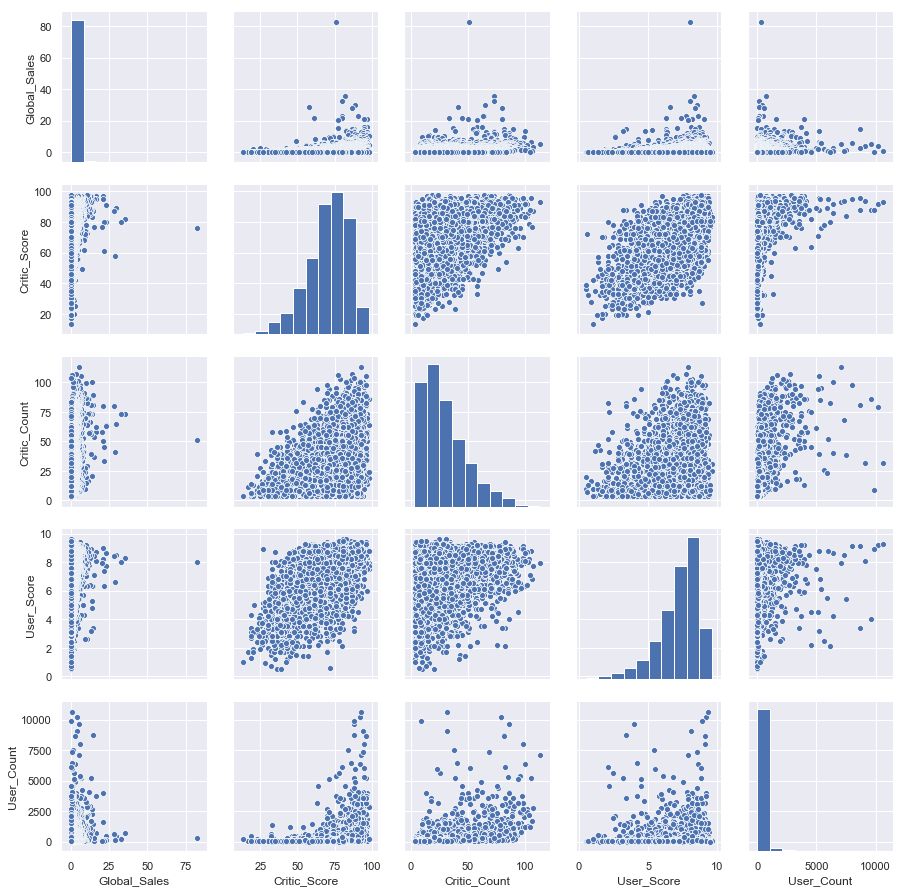

In [11]:
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']]);

### distplot()
It is also possible to plot a distribution of observations with seaborn's `distplot()`. For example, let's look at the distribution of critics' ratings: Critic_Score. By default, the plot displays a histogram and the kernel density estimate.

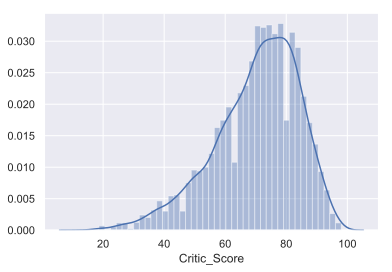

In [14]:
%config InlineBackend.figure_format="svg"
sns.distplot(df["Critic_Score"]);

### jointplot()
To look more closely at the relationship between two numerical variables, you can use joint plot, which is a cross between a scatter plot and histogram. Let's see how the Critic_Score and User_Score features are related.

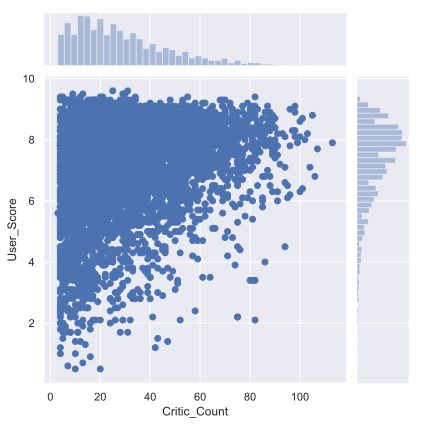

In [16]:
sns.jointplot(x=df["Critic_Count"],y=df["User_Score"],kind="scatter");

### boxplot()
Another useful type of plot is a box plot. Let's compare critics' ratings for the top 5 biggest gaming platforms.

In [23]:
top_platforms=df["Platform"].value_counts().sort_values(ascending=False).head(5).index.values

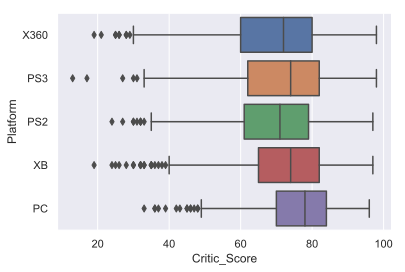

In [34]:
sns.boxplot(y="Platform",x="Critic_Score",data=df[df["Platform"].isin(top_platforms)],orient="h");